# Plotting results

In [1]:
from evaluate import *

In [5]:
mae = lambda y_true, y_pred: np.mean(np.abs(y_true - y_pred))
from scipy.special import gammaln 
poisson_neg_log_lik = lambda y_true, y_pred: np.mean(np.maximum(y_pred, 1e-99) - y_true * np.log(np.maximum(y_pred, 1e-99)) + gammaln(y_true + 1))

## Parameters

In [109]:
data_file_pysr = 's'
data_file_rsrm = 's_scaled'
pysr_equation_file = 'hall_of_fame_2024-10-31_s.csv'
rsrm_equation_file = '20241107_230424_s_scaled.txt'

In [110]:
import pandas as pd
root0 = r'c:\Users\marti\OneDrive\Documentos\Universidade\2024_2025\Symbolic Regression\\'
data_root = root0 + r'RSRM\data\SR\\'

## PySR

In [111]:
df1 = pd.read_csv(data_root + data_file_pysr + '_train.csv')
df2 = pd.read_csv(data_root + data_file_pysr + '_test.csv')
df2 = df2.drop(df2.index[-2])
pysr_data_df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [112]:
pysr_root = root0 + r'PySR\\'
pysr_full_df = pd.read_csv(pysr_root + pysr_equation_file)
variables = {'x₁': 'H', 'x₂': 'Sl', 'x₃': 'P', 'x₄': 'T', 'x₅': 'D'}
pysr_full_df['Equation'] = pysr_full_df['Equation'].apply(replace_variables, var_map=variables)
pysr_eqs = pysr_full_df['Equation']
pysr_full_df['Complexity'] = pysr_full_df['Equation'].apply(count_weighted_operations)
pysr_full_df.head()

,Complexity,Loss,Equation
0,0,5.020843,Sl
1,1,2.426122,2.6862745097572027
2,2,2.185556,18.57436336607573 - T
3,2,2.048562,H * 0.006152114412530031
4,3,2.024326,0.005595745714100228 * (D + H)


In [113]:
pysr_lambdified_functions = lambdify_equations(pysr_eqs)
print(pysr_eqs)

0                                                    Sl
1                                    2.6862745097572027
2                                 18.57436336607573 - T
3                              H * 0.006152114412530031
4                        0.005595745714100228 * (D + H)
5                        inverse(D) * 93.54339296999844
6                  square(log1p(D) + -5.24901316055128)
7     -7.955223383825804 - saturation(-7.96597353734...
8     -7.960135083148201 - saturation(D - -0.0124721...
9     square(3.390807652633397 - (0.0576755374040718...
10    0.8088371087364343 + square(-3.39080764870071 ...
11    (Sl * square(-4.210720255865451 + log1p(Sl + D...
12    (Sl * square(-4.490916690566877 + log1p(Sl + (...
13    1.628885753548842 + ((square(-4.26137218594766...
14    1.6547736487273255 + (Sl * (-0.100653884002282...
15    (Sl * (square(-4.347694853114822 + log1p((Sl *...
16    (Sl * square(-4.178137632728774 + log1p(Sl + (...
17    (Sl * square(log1p(((damping(-0.6929772166

            H         Sl            P          T          D    S  \
0  397.302307   1.445336  1673.500000  15.350000  48.381020  5.0   
1  675.513489   9.114713  2343.100098  13.600000  20.913511  9.0   
2  370.620911   3.326229  1851.500000  15.349999  62.697910  1.0   
3  422.464600  17.060272  2307.199951  15.250001  35.681202  1.0   
4  523.255371   7.285453  2198.000000  14.349999  42.711586  1.0   

   Prediction_1  Prediction_2  Prediction_3  Prediction_4  ...  Prediction_10  \
0      1.445336      2.686275      3.224363      2.444249  ...       1.169325   
1      9.114713      2.686275      4.974363      4.155836  ...       5.581356   
2      3.326229      2.686275      3.224364      2.280102  ...       0.859610   
3     17.060272      2.686275      3.324362      2.599051  ...       2.585393   
4      7.285453      2.686275      4.224364      3.219127  ...       1.668897   

   Prediction_11  Prediction_12  Prediction_13  Prediction_14  Prediction_15  \
0       1.169325       1

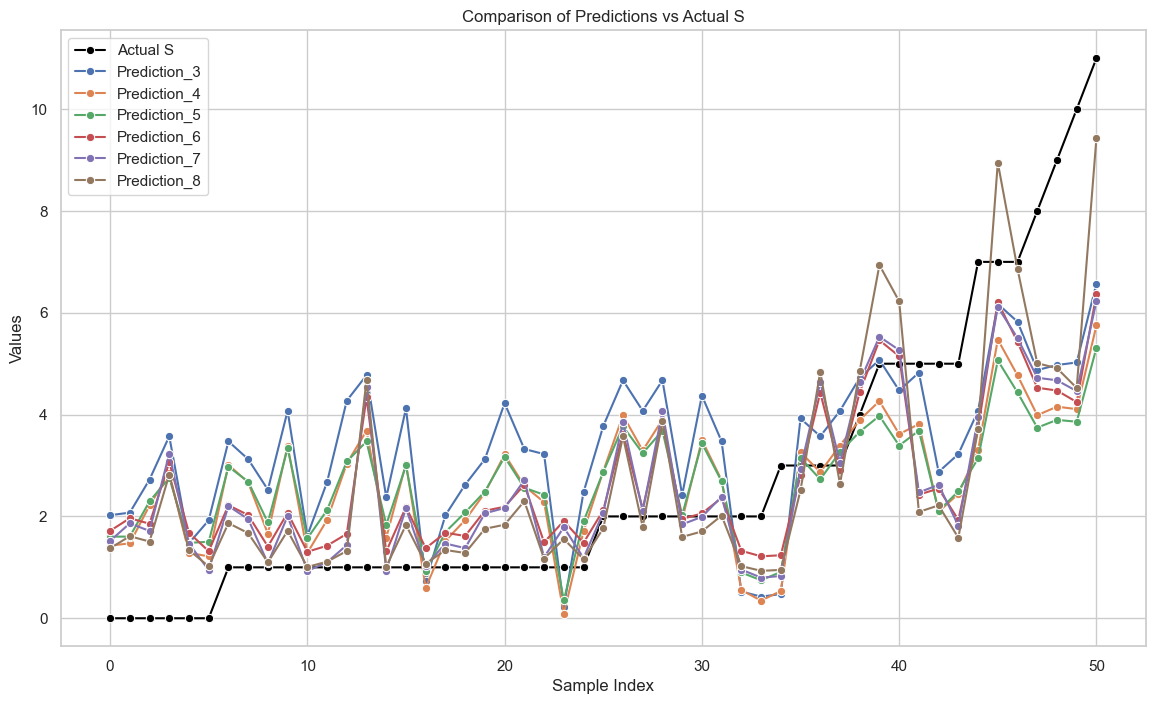

In [114]:
pysr_predictions_df = evaluate_equations(pysr_data_df, pysr_lambdified_functions)

print(pysr_predictions_df.head())
plot_predictions(pysr_predictions_df, range(3,9))

In [115]:
losses = [poisson_neg_log_lik(pysr_data_df['S'], pysr_predictions_df[f'Prediction_{i+1}']) for i in range(pysr_full_df.shape[0])]
pysr_full_df['Loss'] = losses

In [116]:
pysr_full_df

,Complexity,Loss,Equation
0,0,5.020843,Sl
1,1,2.426122,2.6862745097572027
2,2,2.185556,18.57436336607573 - T
3,2,2.048562,H * 0.006152114412530031
4,3,2.024326,0.005595745714100228 * (D + H)
5,3,1.827594,inverse(D) * 93.54339296999844
6,6,1.821995,square(log1p(D) + -5.24901316055128)
7,8,1.768624,-7.955223383825804 - saturation(-7.96597353734...
8,11,1.768624,-7.960135083148201 - saturation(D - -0.0124721...
9,7,1.731473,square(3.390807652633397 - (0.0576755374040718...


## RSRM

In [117]:
df1 = pd.read_csv(data_root + data_file_rsrm + '_train.csv')
df2 = pd.read_csv(data_root + data_file_rsrm + '_test.csv')
df2 = df2.drop(df2.index[-2])
rsrm_data_df = pd.concat([df1, df2], axis=0, ignore_index=True)
rsrm_data_df.head()

,H,Sl,P,T,D,S
0,-0.163291,-1.104138,-0.570179,0.082244,0.143491,5.0
1,1.445605,0.184432,0.765836,-1.278518,-1.336161,9.0
2,-0.317590,-0.788120,-0.215026,0.082243,0.914731,1.0
3,-0.017778,1.519406,0.694206,0.004487,-0.540638,1.0
4,0.565096,-0.122911,0.476326,-0.695335,-0.161916,1.0


In [118]:
rsrm_root = root0 + r'RSRM\output\\'
variables = {'X1': 'H', 'X2': 'Sl', 'X3': 'P', 'X4': 'T', 'X5': 'D'}
times = list()
expressions = list()
with open(rsrm_root + rsrm_equation_file) as f:
    lines = f.readlines()
    for line in lines[7:]:
        if line.startswith('time:'):
            time = float(line.split(': ')[1].replace('s', ''))
            times.append(time)
        if line.startswith('expression:'):
            expression = line.split(': ')[1].strip()
            expressions.append(expression)

# Create a DataFrame
rsrm_full_df = pd.DataFrame({
    'Time': times,
    'Equation': expressions
})
rsrm_full_df['Equation'] = rsrm_full_df['Equation'].apply(replace_variables, var_map=variables)
rsrm_eqs = rsrm_full_df['Equation']
rsrm_full_df['Complexity'] = rsrm_full_df['Equation'].apply(count_weighted_operations)
rsrm_full_df.head()

,Time,Equation,Complexity
0,219.45,(H + exp(D) + 0.35259487174396824*exp(H - P))*...,10
1,375.51,(H + exp(D) + 0.35259487174396824*exp(H - P))*...,10
2,599.53,exp(D**2*(-D + exp(H))/(P*(Sl*P - P + 6.394369...,13
3,733.91,-H + exp(H + D/(-P - D - 1.997487837491776)),8
4,964.55,-H + exp(H + D/(-P - D - 1.997487837491776)),8


In [119]:
rsrm_lambdified_functions = lambdify_equations(rsrm_eqs)
print(rsrm_eqs)

0     (H + exp(D) + 0.35259487174396824*exp(H - P))*...
1     (H + exp(D) + 0.35259487174396824*exp(H - P))*...
2     exp(D**2*(-D + exp(H))/(P*(Sl*P - P + 6.394369...
3          -H + exp(H + D/(-P - D - 1.997487837491776))
4          -H + exp(H + D/(-P - D - 1.997487837491776))
                            ...                        
74    H*exp(H) + Sl*(H - T)*(H + T)/(H + D/Sl) - P -...
75    H*exp(H) + Sl*(H - T)*(H + T)/(H + D/Sl) - P -...
76    H*exp(H) + Sl*(H - T)*(H + T)/(H + D/Sl) - P -...
77    H*exp(H) + Sl*(H - T)*(H + T)/(H + D/Sl) - P -...
78    H*exp(H) + Sl*(H - T)*(H + T)/(H + D/Sl) - P -...
Name: Equation, Length: 79, dtype: object


          H        Sl         P         T         D    S  Prediction_1  \
0 -0.163291 -1.104138 -0.570179  0.082244  0.143491  5.0      1.317383   
1  1.445605  0.184432  0.765836 -1.278518 -1.336161  9.0      9.146860   
2 -0.317590 -0.788120 -0.215026  0.082243  0.914731  1.0      1.000254   
3 -0.017778  1.519406  0.694206  0.004487 -0.540638  1.0      1.266545   
4  0.565096 -0.122911  0.476326 -0.695335 -0.161916  1.0      2.117470   

   Prediction_2  Prediction_3  Prediction_4  ...  Prediction_70  \
0      1.317383      0.996649      0.938486  ...       2.642953   
1      9.146860      9.533117      9.379218  ...       8.865922   
2      1.000254      1.113209      0.836133  ...       0.386983   
3      1.266545      1.099583      1.280864  ...       1.355227   
4      2.117470      1.018213      1.322175  ...       2.231374   

   Prediction_71  Prediction_72  Prediction_73  Prediction_74  Prediction_75  \
0       2.642953       2.642953       2.642953       2.642953       2.64

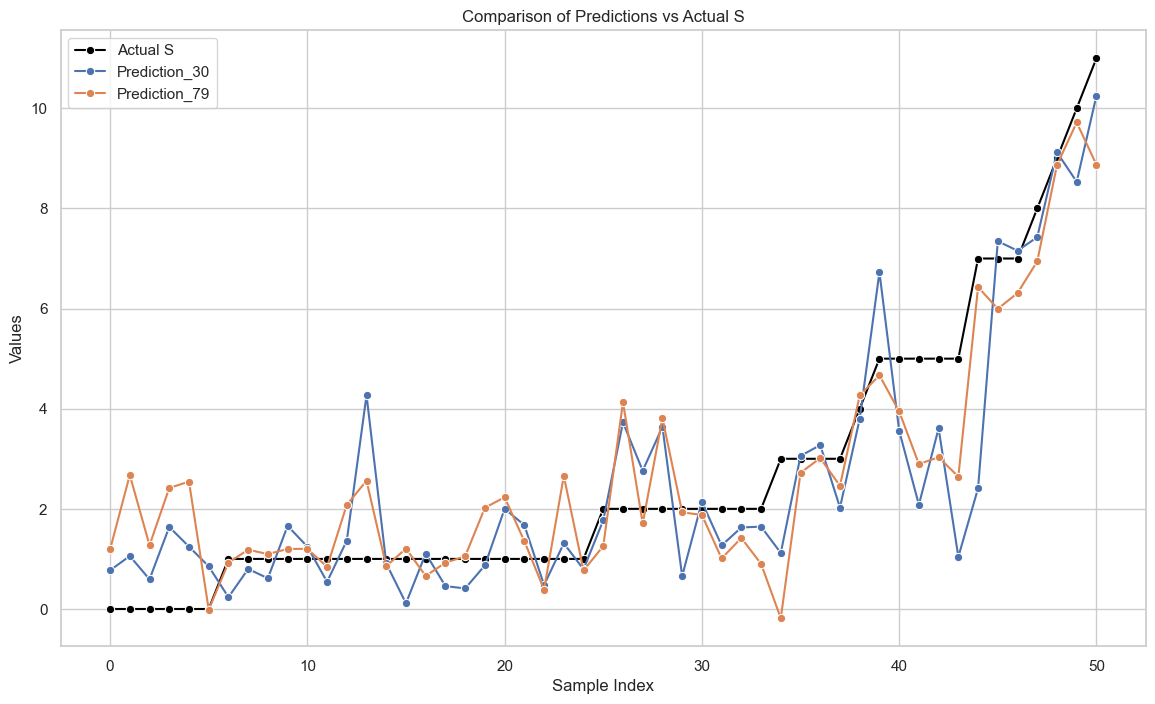

In [120]:
rsrm_predictions_df = evaluate_equations(rsrm_data_df, rsrm_lambdified_functions)

print(rsrm_predictions_df.head())
plot_predictions(rsrm_predictions_df, [30, 79]) 

In [121]:
losses = np.array([poisson_neg_log_lik(rsrm_data_df['S'], rsrm_predictions_df[f'Prediction_{i+1}']) for i in range(rsrm_full_df.shape[0])])
losses[losses > 14] = 2.76
rsrm_full_df['Loss'] = losses

In [122]:
# Filter columns that start with 'Prediction_'
prediction_cols = [col for col in rsrm_predictions_df.columns if col.startswith('Prediction_')]

# Find non-positive values
mask = (rsrm_predictions_df[prediction_cols] <= 0)

# Get the indices, column names, and values of non-positive values
non_positive_coords_values = [(index, col, rsrm_predictions_df.at[index, col]) 
                              for col in prediction_cols 
                              for index in rsrm_predictions_df.index[mask[col]]]

print("Coordinates and values of non-positive values:")
for coord in non_positive_coords_values:
    print(coord)


Coordinates and values of non-positive values:
(36, 'Prediction_18', -0.0033736210321660687)
(36, 'Prediction_19', -0.0033736210321660687)
(36, 'Prediction_20', -0.0033736210321660687)
(40, 'Prediction_50', -0.18495302568893246)
(42, 'Prediction_50', -0.010807716536760381)
(40, 'Prediction_51', -0.18495302568893246)
(42, 'Prediction_51', -0.010807716536760381)
(40, 'Prediction_52', -0.18495302568893246)
(42, 'Prediction_52', -0.010807716536760381)
(40, 'Prediction_53', -0.18495302568893246)
(42, 'Prediction_53', -0.010807716536760381)
(40, 'Prediction_54', -0.18495302568893246)
(42, 'Prediction_54', -0.010807716536760381)
(40, 'Prediction_55', -0.18495302568893246)
(42, 'Prediction_55', -0.010807716536760381)
(40, 'Prediction_56', -0.18495302568893246)
(42, 'Prediction_56', -0.010807716536760381)
(40, 'Prediction_57', -0.18495302568893246)
(42, 'Prediction_57', -0.010807716536760381)
(40, 'Prediction_58', -0.18495302568893246)
(42, 'Prediction_58', -0.010807716536760381)
(40, 'Predicti

# Results

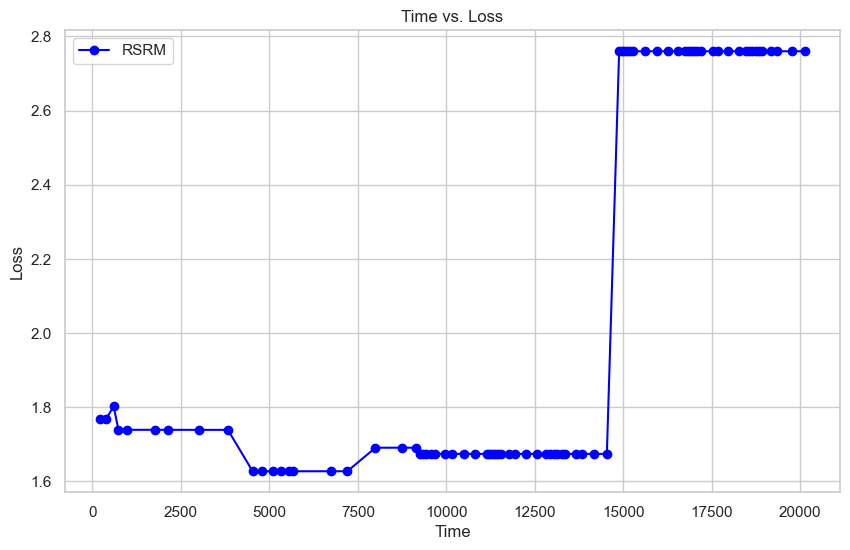

In [123]:
plot_x_vs_y(['RSRM', rsrm_full_df], 'Time', 'Loss')

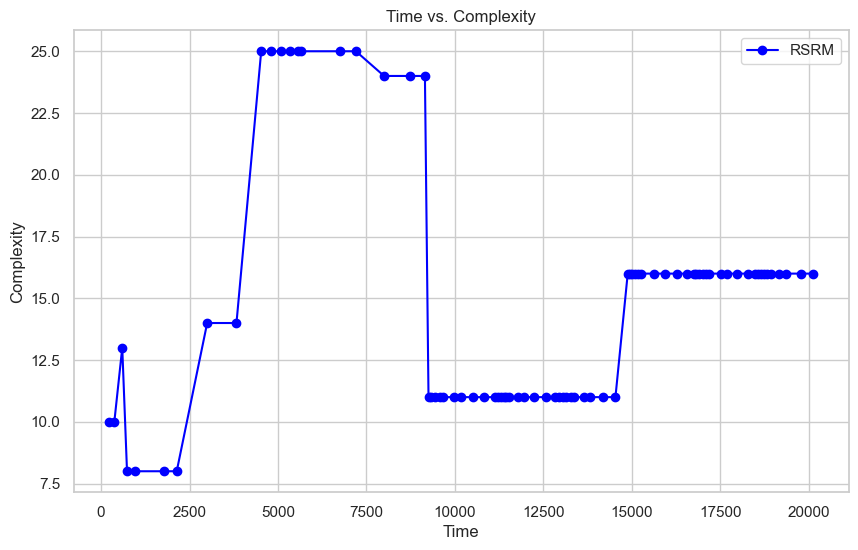

In [124]:
plot_x_vs_y(['RSRM', rsrm_full_df], 'Time', 'Complexity')

In [125]:
temp_df = rsrm_full_df.drop_duplicates(['Equation'])
temp_df.head()

,Time,Equation,Complexity,Loss
0,219.45,(H + exp(D) + 0.35259487174396824*exp(H - P))*...,10,1.767057
2,599.53,exp(D**2*(-D + exp(H))/(P*(Sl*P - P + 6.394369...,13,1.802370
3,733.91,-H + exp(H + D/(-P - D - 1.997487837491776)),8,1.739247
7,2999.22,(H + log(exp(H) + 1))*(0.8106548922669096*H - ...,14,1.739084
9,4525.63,-P + T*D - T - D*exp(H)*exp(-P) - 0.4084734979...,25,1.627483


In [126]:
pysr_full_df.head()

,Complexity,Loss,Equation
0,0,5.020843,Sl
1,1,2.426122,2.6862745097572027
2,2,2.185556,18.57436336607573 - T
3,2,2.048562,H * 0.006152114412530031
4,3,2.024326,0.005595745714100228 * (D + H)


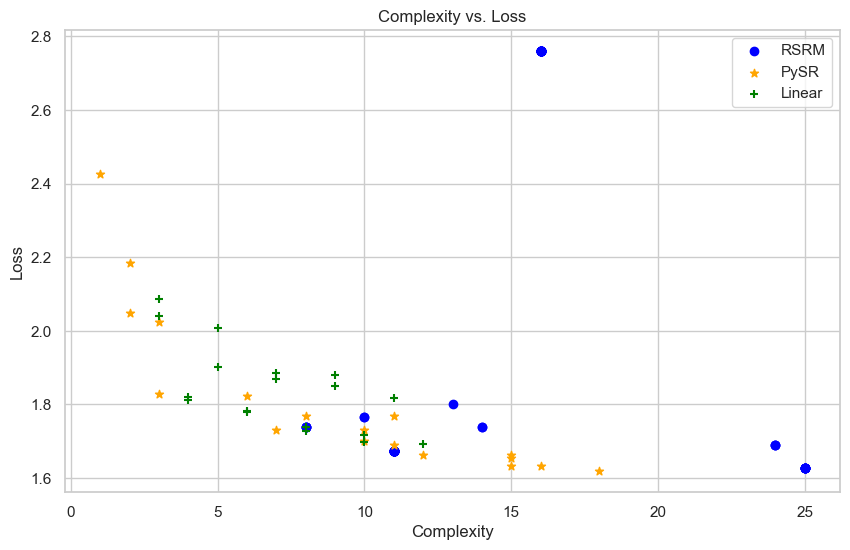

In [129]:
# Filter linear_full_df
df_sorted = linear_full_df.sort_values(by=['Complexity', 'Loss'], ascending=[True, True])
df_top2 = df_sorted.groupby('Complexity').head(2).reset_index(drop=True)
plot_x_vs_y([['RSRM', rsrm_full_df], ['PySR', pysr_full_df.iloc[1:]], ['Linear', df_top2]], 'Complexity', 'Loss', scatter=True)

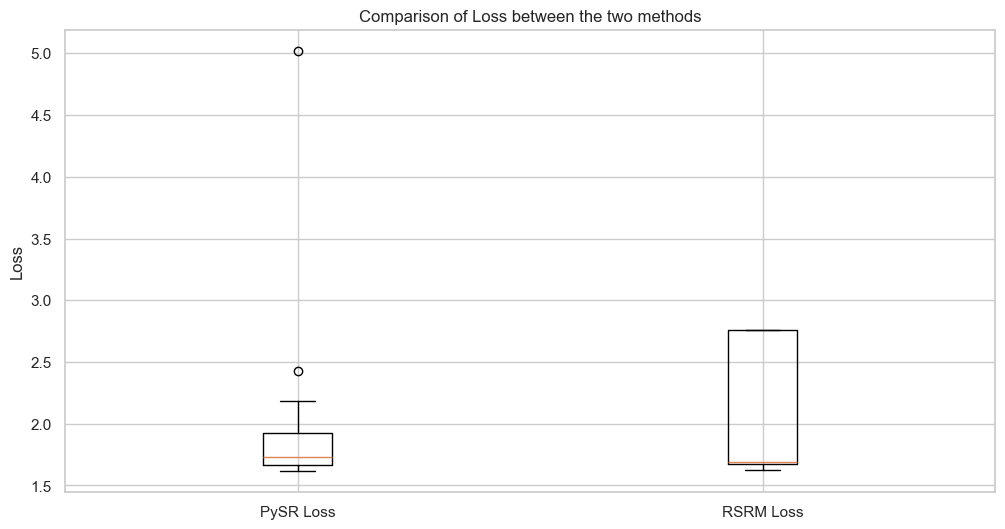

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create boxplots
plt.boxplot([pysr_full_df['Loss'], rsrm_full_df['Loss']], labels=['PySR Loss', 'RSRM Loss'])

# Title and labels
plt.title('Comparison of Loss between the two methods')
plt.ylabel('Loss')
plt.grid(True)

# Show plot
plt.show()


## Export to latex

In [54]:
import pandas as pd
import re

def custom_round(x):
    if x < 0.1:
        return "{:.2e}".format(x)
    else:
        return str(round(x, 2))

def round_constants_in_equation(equation):
    # Ensure the equation is treated as a single string
    if isinstance(equation, list):
        equation = ''.join(map(str, equation))
    
    # Use regex to find all numbers in the equation and round them
    def round_match(match):
        value = float(match.group())
        return f"{value:.2f}"
    
    # Match numbers including those in scientific notation
    rounded_equation = re.sub(r'-?\d+\.\d+(e[+-]?\d+)?', round_match, equation)
    return rounded_equation

def csv_to_latex(df):
    df = df.copy()
    # Ensure all entries in the 'Equation' column are strings
    df['Equation'] = df['Equation'].astype(str)
    
    # Round the 'Loss' column to 2 decimal places
    df['Loss'] = df['Loss'].apply(custom_round)
    
    # Round the constants in the 'Equation' column
    df['Equation'] = df['Equation'].apply(round_constants_in_equation)
    
    # Start LaTeX table
    latex_table = "\\begin{table}[h!]\n\\centering\n\\begin{tabular}{|c|c|l|}\n\\hline\n"
    latex_table += "\\textbf{Complexity} & \\textbf{Loss} & \\textbf{Equation} \\\\\n\\hline\n"
    
    # Add rows
    for index, row in df.iterrows():
        latex_table += f"{row['Complexity']} & {row['Loss']} & {row['Equation']} \\\\\n"
    
    # End LaTeX table
    latex_table += "\\hline\n\\end{tabular}\n\\caption{Complexity, Loss, and Equation data}\n\\label{{tab:complexity_loss_equation}}\n\\end{table}"
    
    return latex_table
# Generate LaTeX table
latex_df = pd.read_csv(root0 + r'PySR\hall_of_fame_2024-11-07_sdm_scaled.csv')
variables = {'x₁': 'H', 'x₂': 'Sl', 'x₃': 'P', 'x₄': 'T', 'x₅': 'D'}
latex_df['Equation'] = latex_df['Equation'].apply(replace_variables, var_map=variables)
latex_df['Complexity'] = latex_df['Equation'].apply(count_weighted_operations)
latex_output = csv_to_latex(latex_df)
print(latex_output)

\begin{table}[h!]
\centering
\begin{tabular}{|c|c|l|}
\hline
\textbf{Complexity} & \textbf{Loss} & \textbf{Equation} \\
\hline
0 & 0.63 & H \\
2 & 0.37 & -1.97 \\
3 & 0.25 & H + -2.31 \\
4 & 0.2 & -3.03 - (T + D) \\
5 & 0.18 & (-3.93 - D) - (T + T) \\
5 & 0.18 & H - square(H + -2.26) \\
5 & 0.14 & ((P - 5.86) * T) - 5.73 \\
7 & 0.11 & -5.77 - harmonic(P - T, T) \\
7 & 2.24e-03 & 57.48 * (H - (P - (-1.40 - D))) \\
8 & 1.02e-03 & ((H - (P - (-1.40 - D))) * 59.82) - Sl \\
9 & 4.94e-04 & (62.30 * ((H + (-1.40 - D)) - P)) - (Sl + Sl) \\
9 & 3.49e-04 & (59.60 * (H - (P - (-1.42 - D)))) - inverse(Sl) \\
10 & 2.83e-04 & ((63.44 * (H - (P - (-1.42 - D)))) - (Sl - P)) - Sl \\
10 & 1.64e-04 & ((62.10 * (H - (P - (-1.41 - D)))) - inverse(Sl)) - Sl \\
12 & 3.40e-05 & (110.98 * (H - (P - (-1.39 - D)))) - damping(Sl, -0.55) \\
11 & 3.32e-06 & (((H + (-1.35 - D)) - P) * 101.18) - (10.74 * square(Sl)) \\
11 & 3.25e-06 & (85.20 * (H - (P - (-1.41 - D)))) - (square(H + H) * Sl) \\
12 & 2.57e-07 & (104.09

# Linear model

In [67]:
import itertools
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings("ignore", category=sm.tools.sm_exceptions.DomainWarning)

linear_data_df = rsrm_data_df.copy()

# Define the features and target
features = ['H', 'Sl', 'P', 'T', 'D']
target = 'S'

# Function to get the model formula
def get_formula(features):
    return target + ' ~ ' + ' + '.join(features)

# List to store model metrics
model_metrics = []

# Generate all combinations of features
for L in range(1, len(features) + 1):
    for subset in itertools.combinations(features, L):
        complexity = 1 + 2*len(subset)
        formula = get_formula(subset)
        
        for link, link_name in [(sm.families.links.Identity(), "Identity"), (sm.families.links.Log(), "Exponential")]:
            complexity += int(link_name == "Exponential")
            model = smf.glm(formula=formula, data=linear_data_df, family=sm.families.Poisson(link=link)).fit()
            aic = model.aic
            neg_log_likelihood = -model.llf  # Negative log-likelihood
            params = model.params  # Model parameters (coefficients)
            model_metrics.append((formula, link_name, complexity, aic, neg_log_likelihood/linear_data_df.shape[0], params))

columns = ["Formula", "Link Function", "Complexity", "AIC", "Loss", "Parameters"]
linear_full_df = pd.DataFrame(model_metrics, columns=columns)

linear_full_df = linear_full_df.sort_values(by='AIC')

# Get the best 5 models
linear_full_df.head()

c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:477: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -


,Formula,Link Function,Complexity,AIC,Loss,Parameters
57,S ~ H + P + T + D,Exponential,10,183.164945,1.697696,Intercept 0.743064 H 2.179392 P ...
39,S ~ H + P + D,Exponential,8,184.296421,1.728396,Intercept 0.737038 H 0.790047 P ...
61,S ~ H + Sl + P + T + D,Exponential,12,184.499279,1.691169,Intercept 0.742117 H 2.109265 Sl...
53,S ~ H + Sl + P + D,Exponential,10,185.051320,1.716189,Intercept 0.734861 H 0.847398 Sl...
37,S ~ H + P + T,Exponential,8,185.242388,1.737670,Intercept 0.766289 H 2.713757 P ...


In [30]:
import itertools
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

data_file_linear = 'alestrus'
df1 = pd.read_csv(data_root + data_file_linear + '_train.csv')
df2 = pd.read_csv(data_root + data_file_linear + '_test.csv')
linear_data_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Define the features and target
features = ['H', 'Sl', 'P', 'T', 'D']
target = 'Alestrus'

# Function to get the model formula
def get_formula(features):
    return target + ' ~ ' + ' + '.join(features)

# List to store model metrics
model_metrics = []

# Generate all combinations of features
for L in range(1, len(features) + 1):
    for subset in itertools.combinations(features, L):
        formula = get_formula(subset)
        link = sm.families.links.Logit()
        model = smf.glm(formula=formula, data=linear_data_df, family=sm.families.Binomial(link=link)).fit()
        aic = model.aic
        neg_log_likelihood = -model.llf  # Negative log-likelihood
        params = model.params  # Model parameters (coefficients)
        model_metrics.append((aic, neg_log_likelihood, formula, 'Logit', params))

# Sort models by AIC
model_metrics.sort()

# Get the best 5 models
best_5_models = model_metrics[:5]

# Print the best 5 models, their AICs, negative log-likelihoods, and parameters
print("Best 5 Models:")
for aic, neg_log_likelihood, formula, link_name, params in best_5_models:
    print(f"Model: {formula} \nAIC: {aic} \nMean Negative Log-Likelihood: {neg_log_likelihood/linear_data_df.shape[0]} \nParameters: \n{params}\n")


Best 5 Models:
Model: Alestrus ~ H + P 
AIC: 13.699864088032378 
Mean Negative Log-Likelihood: 0.07403715469261901 
Parameters: 
Intercept   -6.344890
H            0.097879
P           -0.024365
dtype: float64

Model: Alestrus ~ P + T 
AIC: 17.586418700700307 
Mean Negative Log-Likelihood: 0.11140787212211833 
Parameters: 
Intercept    124.837155
P             -0.009912
T             -7.478211
dtype: float64

Model: Alestrus ~ Sl + P + T 
AIC: 19.417072786022587 
Mean Negative Log-Likelihood: 0.10977954601944795 
Parameters: 
Intercept    136.813940
Sl            -0.105520
P             -0.011058
T             -8.089363
dtype: float64

Model: Alestrus ~ P + D 
AIC: 22.429748859102435 
Mean Negative Log-Likelihood: 0.1579783544144465 
Parameters: 
Intercept    18.006304
P            -0.003426
D            -0.489649
dtype: float64

Model: Alestrus ~ D 
AIC: 23.29159422605942 
Mean Negative Log-Likelihood: 0.18549609832749442 
Parameters: 
Intercept    3.257875
D           -0.204824
dtype

c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\marti\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeW

In [75]:
cross_val_df = pd.read_csv('Treated results/s_cross_validation.csv')
cross_val_df['Complexity'] = cross_val_df['Equation'].apply(count_weighted_operations)
cross_val_df

,Unnamed: 0,Pseudo R²,Pearson Statistic,AIC,Equation,Run,Complexity
0,0,0.003278,23.379053,-3.049620,3.917838,1,1
1,1,0.208147,14.519910,-0.011709,exp(H),1,1
2,2,0.238428,12.531343,2.141704,2.9513326 / D,1,1
3,3,0.284390,10.617342,6.374559,(4.337449 / D) - P,1,2
4,4,0.187435,17.377194,9.883360,sqrt(square(1.6066619 - D) * 31.239956),1,6
...,...,...,...,...,...,...,...
149,149,0.182228,9.585231,66.507774,((square(H - (D + -0.7057842)) + 0.08079517) /...,5,25
150,150,0.186235,10.367972,68.524887,((square(H - (D + -0.7057842)) + 0.08079519) /...,5,25
151,151,0.207548,8.860013,70.615902,((square(H - (D + -0.7057842)) + 0.081813015) ...,5,25
152,152,0.206426,8.645376,72.611109,((square(H - (D + -0.7057842)) + 0.08079517) /...,5,27


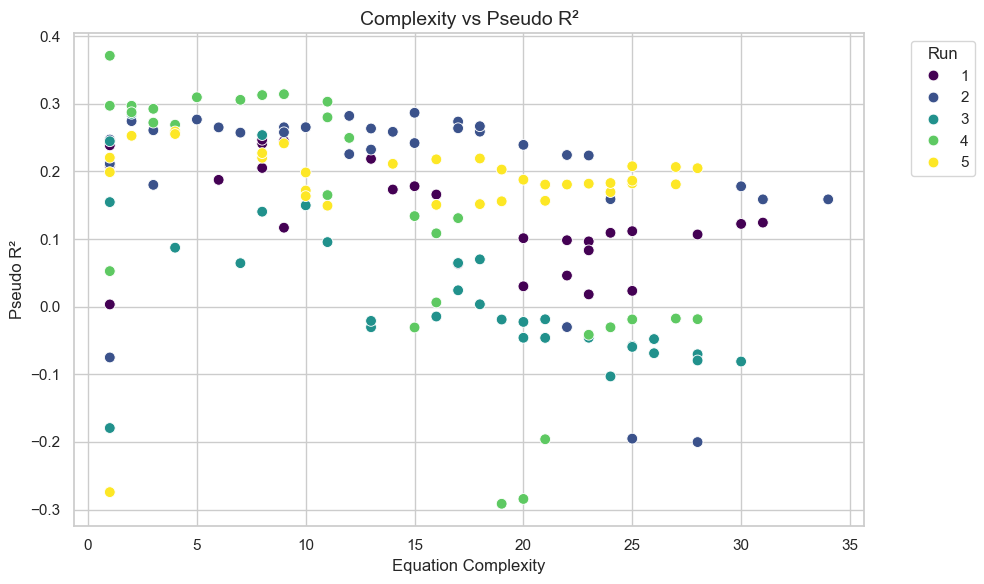

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = cross_val_df
df['Complexity'] = pd.to_numeric(df['Complexity'], errors='coerce')

# Plot Complexity vs Pseudo R²
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Complexity', y='Pseudo R²', hue='Run', palette='viridis', s=60)
plt.title('Complexity vs Pseudo R²', fontsize=14)
plt.xlabel('Equation Complexity', fontsize=12)
plt.ylabel('Pseudo R²', fontsize=12)
plt.legend(title='Run', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_96724\2939973614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Run', y='Pseudo R²', palette='Set2')


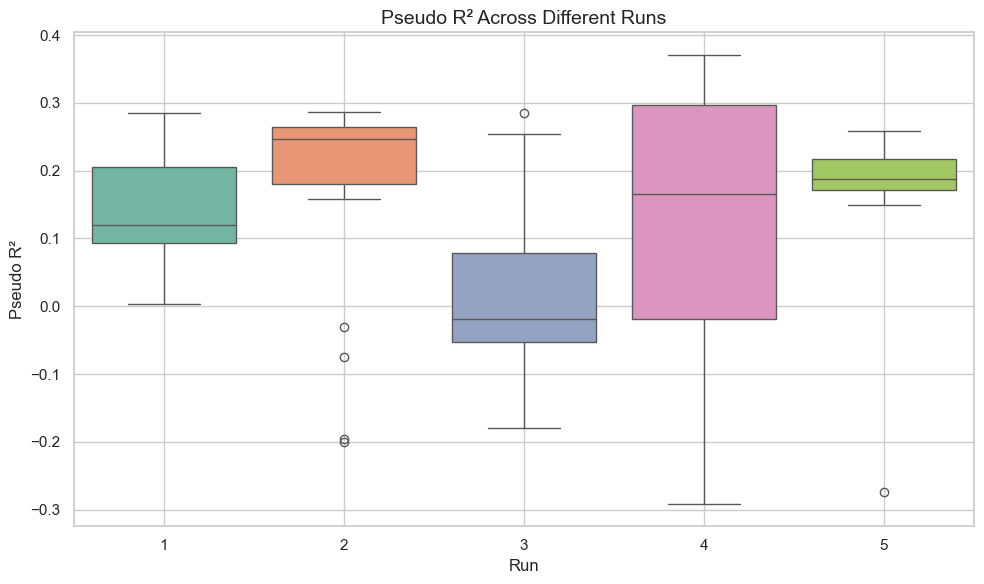

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Run', y='Pseudo R²', palette='Set2')
plt.title('Pseudo R² Across Different Runs', fontsize=14)
plt.xlabel('Run', fontsize=12)
plt.ylabel('Pseudo R²', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
from scipy.stats import chi2
def compute_p_value(pearson_statistic, DF):
    p_value = chi2.sf(pearson_statistic, DF)
    return p_value

In [119]:
# High p-value indicates no evidence of lack of fit
Pearson_statistic = 27.84  # Example value
degrees_of_freedom = 30 - 1 - 1  # Replace n and k with your actual values

# Calculate the p-value
p_value = compute_p_value(Pearson_statistic, degrees_of_freedom)

print(f"Pearson Statistic: {Pearson_statistic}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value}")


Pearson Statistic: 27.84
Degrees of Freedom: 28
P-Value: 0.4729503648830967


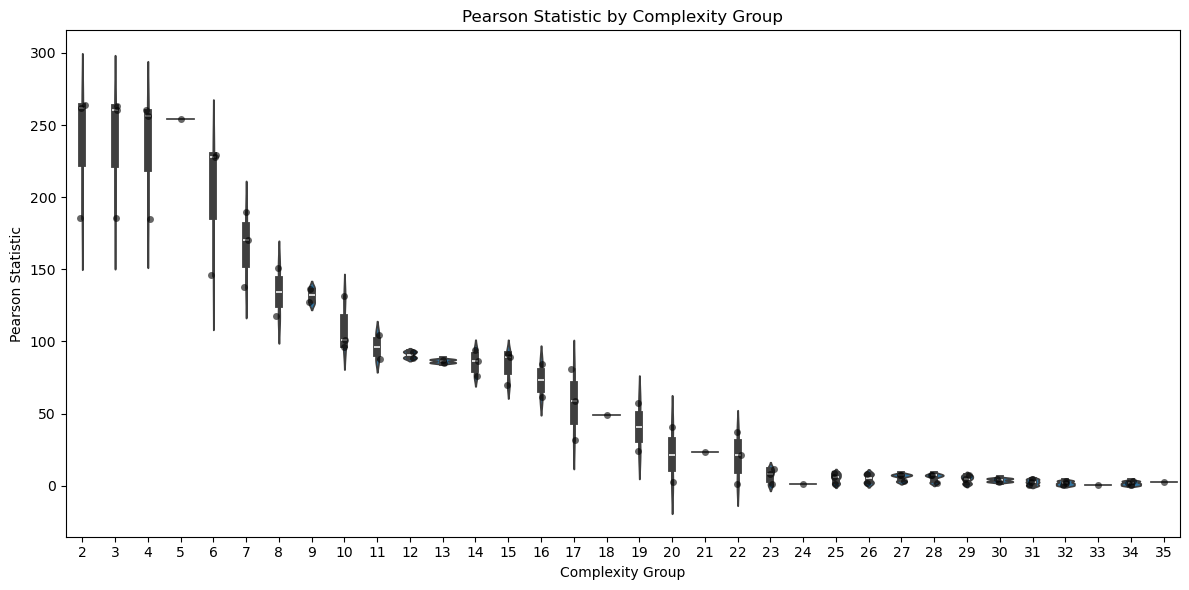

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cross_val_df = pd.read_csv('Treated results/GDMscolopendrites_cross_validation.csv')
cross_val_df['Complexity2'] = cross_val_df['Equation'].apply(count_weighted_operations)

df = cross_val_df.copy()
df = df[df['Pearson Statistic'] > 0]
df['p-value'] = df['Pearson Statistic'].apply(compute_p_value, args=(28,))

bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']

# Create a new column for complexity groups
df['Complexity Group'] = pd.cut(df['Complexity'], bins=bins, labels=labels)

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(bw_method=0.4, x='Complexity', y='Pearson Statistic', data=df)
sns.stripplot(x='Complexity', y='Pearson Statistic', data=df, color='k', alpha=0.6, jitter=True)
plt.title('Pearson Statistic by Complexity Group')
plt.xlabel('Complexity Group')
plt.ylabel('Pearson Statistic')
# plt.ylim(0,20)
plt.tight_layout()
plt.show()


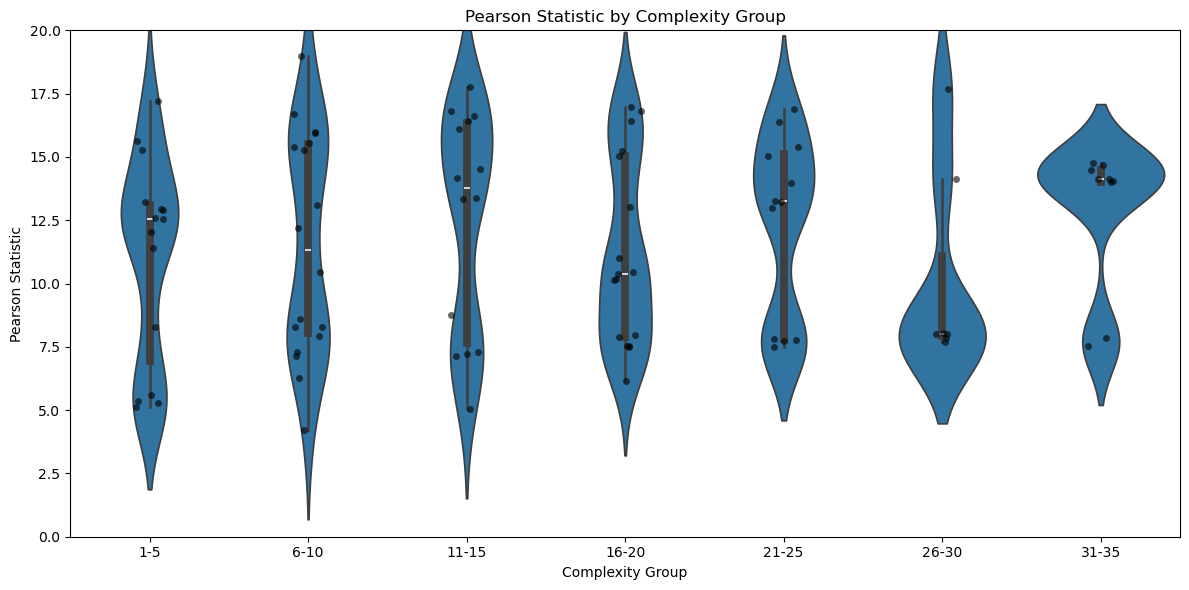

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cross_val_df = pd.read_csv('Treated results/s_cross_validation_power.csv')
cross_val_df['Complexity2'] = cross_val_df['Equation'].apply(count_weighted_operations)

df = cross_val_df.copy()
df = df[(df['Pearson Statistic'] > 0) & (df['Pearson Statistic'] < 20)]

bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']

# Create a new column for complexity groups
df['Complexity Group'] = pd.cut(df['Complexity'], bins=bins, labels=labels)
df['p-value'] = df['Pearson Statistic'].apply(compute_p_value, args=(10-5-1,))

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(bw_method=0.4, x='Complexity Group', y='Pearson Statistic', data=df)
sns.stripplot(x='Complexity Group', y='Pearson Statistic', data=df, color='k', alpha=0.6, jitter=True)
plt.title('Pearson Statistic by Complexity Group')
plt.xlabel('Complexity Group')
plt.ylabel('Pearson Statistic')
plt.ylim(0,20)
plt.tight_layout()
plt.show()


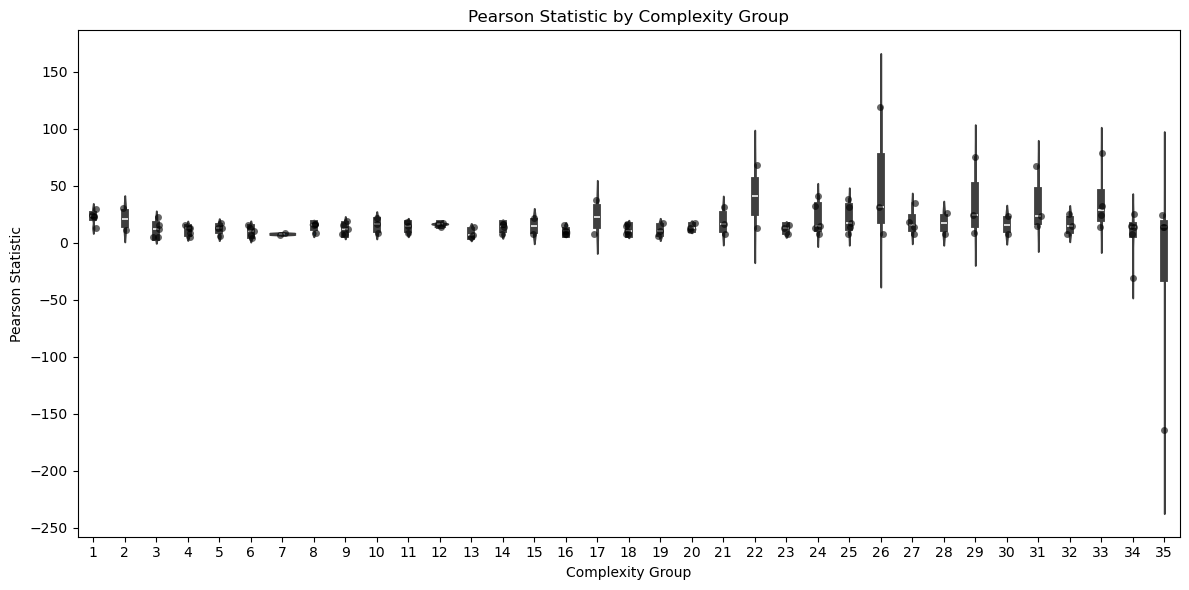

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cross_val_df = pd.read_csv('Treated results/s_cross_validation_power.csv')
cross_val_df['Complexity2'] = cross_val_df['Equation'].apply(count_weighted_operations)

df = cross_val_df.copy()
# df = df[(df['Pearson Statistic'] > 0) & (df['Pearson Statistic'] < 20)]

bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']

# Create a new column for complexity groups
df['Complexity Group'] = pd.cut(df['Complexity'], bins=bins, labels=labels)
df['p-value'] = df['Pearson Statistic'].apply(compute_p_value, args=(10-5-1,))

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(bw_method=0.4, x='Complexity', y='Pearson Statistic', data=df)
sns.stripplot(x='Complexity', y='Pearson Statistic', data=df, color='k', alpha=0.6, jitter=True)
plt.title('Pearson Statistic by Complexity Group')
plt.xlabel('Complexity Group')
plt.ylabel('Pearson Statistic')
# plt.ylim(0,20)
plt.tight_layout()
plt.show()


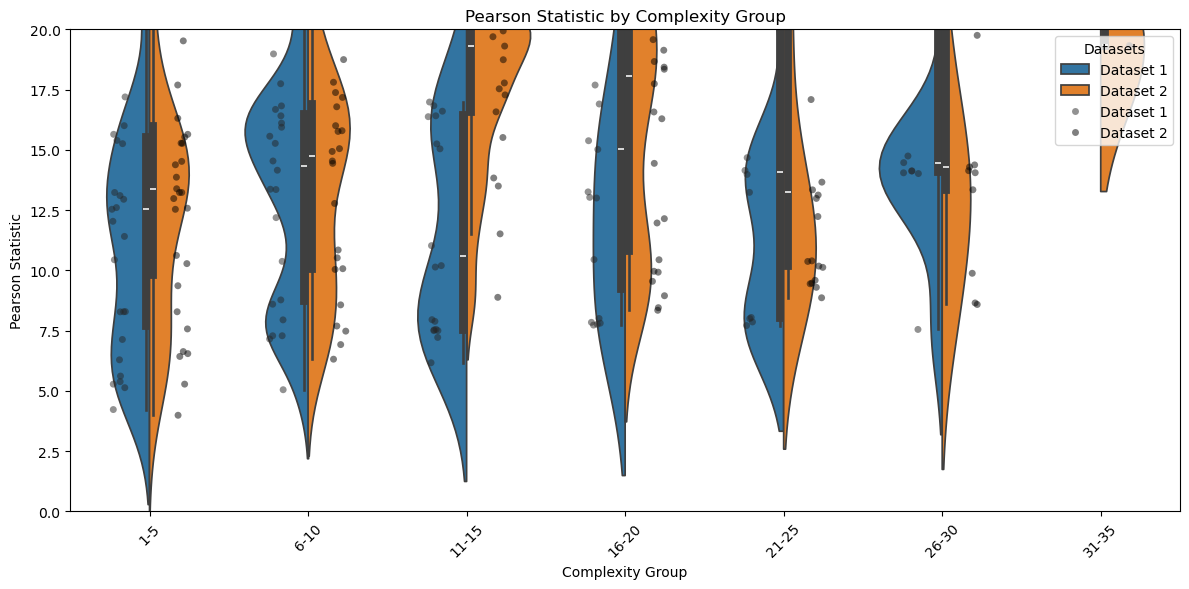

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the first DataFrame
cross_val_df1 = pd.read_csv('Treated results/s_cross_validation_power.csv')
cross_val_df1['Complexity'] = cross_val_df1['Equation'].apply(count_weighted_operations)
cross_val_df1['Dataset'] = 'Dataset 1'  # Add identifier

# Read the second DataFrame
cross_val_df2 = pd.read_csv('Treated results/s_cross_validation.csv')
cross_val_df2['Complexity'] = cross_val_df2['Equation'].apply(count_weighted_operations)
cross_val_df2['Dataset'] = 'Dataset 2'  # Add identifier

# Define the complexity bins and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']

# Create complexity groups for both DataFrames
cross_val_df1['Complexity Group'] = pd.cut(cross_val_df1['Complexity'], bins=bins, labels=labels)
cross_val_df2['Complexity Group'] = pd.cut(cross_val_df2['Complexity'], bins=bins, labels=labels)

# Combine the DataFrames
combined_df = pd.concat([cross_val_df1, cross_val_df2])
combined_df = combined_df[(combined_df['Pearson Statistic'] > 0) & (combined_df['Pearson Statistic'] < 40)]

# Remove duplicates in the index if any
combined_df = combined_df.reset_index(drop=True)

# Initialize the plot
plt.figure(figsize=(12, 6))

# Create half violin plots using hue for different datasets
sns.violinplot(bw_method=0.3, x='Complexity Group', y='Pearson Statistic', hue='Dataset', data=combined_df, split=True)
sns.stripplot(x='Complexity Group', y='Pearson Statistic', hue='Dataset', palette='dark:k', data=combined_df, dodge=True, alpha=0.5)
# Customize plot
plt.ylim(0, 20)
plt.title('Pearson Statistic by Complexity Group')
plt.xlabel('Complexity Group')
plt.ylabel('Pearson Statistic')
plt.xticks(rotation=45)
plt.legend(title='Datasets', loc='upper right')
plt.tight_layout()

# Show plot
plt.show()
